# Principal Component Analysis of Height and Weight Data

Weight and height are strongly correlated. 

But men and women have different weights heights. 

In this exercise you will investigate what information PCA extracts. 

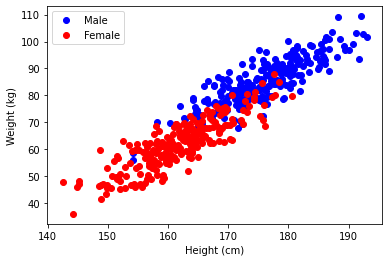

In [ ]:
import matplotlib.pyplot as pl
import pandas as pd
%matplotlib inline

df = pd.read_csv('weights-heights-metric.csv')

pl.plot(df.loc[df['Gender']=='Male', 'Height'], df.loc[df['Gender']=='Male', 'Weight'],'bo',
        df.loc[df['Gender']=='Female', 'Height'], df.loc[df['Gender']=='Female', 'Weight'],'ro')
pl.xlabel('Height (cm)')
pl.ylabel('Weight (kg)')
pl.legend(['Male','Female']);

In [10]:
import numpy as np
import scipy as sp

def pca(X, ncomp=2):
    # subtract the mean
    mu = X.mean(axis = 0)
    Xcentered = X - mu
    # compute covariance matrix
    C = 1 / len(X) * Xcentered.T @ Xcentered
    # compute eigenvectors of covariance matrix
    V, U = np.linalg.eig(C)
    return (Xcentered @ U)


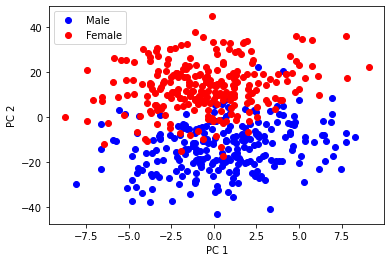

In [11]:
# perform PCA
X = df[['Height','Weight']]
Xpca = pca(X)

# plot data in PCA space
pl.plot(Xpca.loc[df['Gender']=='Male',0],Xpca.loc[df['Gender']=='Male',1],'bo',
       Xpca.loc[df['Gender']=='Female',0],Xpca.loc[df['Gender']=='Female',1],'ro')
pl.xlabel('PC 1')
pl.ylabel('PC 2')
pl.legend(['Male','Female'])

Covariance Matrix for original data and data in pca space

In [12]:
mu = X.mean(axis = 0)
Xcentered = X - mu
C = 1 / len(X) * Xcentered.T @ Xcentered
Cpca = Xpca.T @ Xpca
print(f"Cov width/height: {C.to_numpy()[0,1]}\nCov first PC/second PC {Cpca.to_numpy()[0,1]}")

Cov width/height: 132.75665758725205
Cov first PC/second PC 4.547473508864641e-13
